In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/traffic_to_viz.csv', encoding='unicode_escape').drop(columns=["Unnamed: 0"])

In [4]:
df.columns

Index(['Year', 'Area', 'Date', 'Road', 'Municipality Name', 'County Name',
       'Province Name', 'Fatalties', 'Serious Injuries', 'Light Injuries',
       'Total Victims', 'Units Involved', 'Pedestrains Involved',
       'Bicycles Involved', 'Mopeds Involved', 'Motorcycles',
       'Light Vehicles Involved', 'Heavy Vehicles Involved',
       'Other Units Involved', 'Unspecified Units Involved',
       'Road Speed Limit', 'Accident with Hit and Run', 'Fog Presence',
       'Surrounding Environment', 'Special Lane Presence',
       'Special Traffic Measures', 'Weather Conditions',
       'Special Road Functions', 'Severity of Accident', 'Influence of Fog',
       'Influence of Environment', 'Influence of Traffic',
       'Influence of Weather', 'Influence of Wind Intensity',
       'Influence of Lighting', 'Influence of Special Measures',
       'Influence of Road Objects', 'Influence of Road Surface',
       'Influence of Visibility', 'Intersection Characteristics',
       'Lighting C

In [5]:
df_fatalties = df[["Year","Fatalties", "Serious Injuries", "Light Injuries"]]

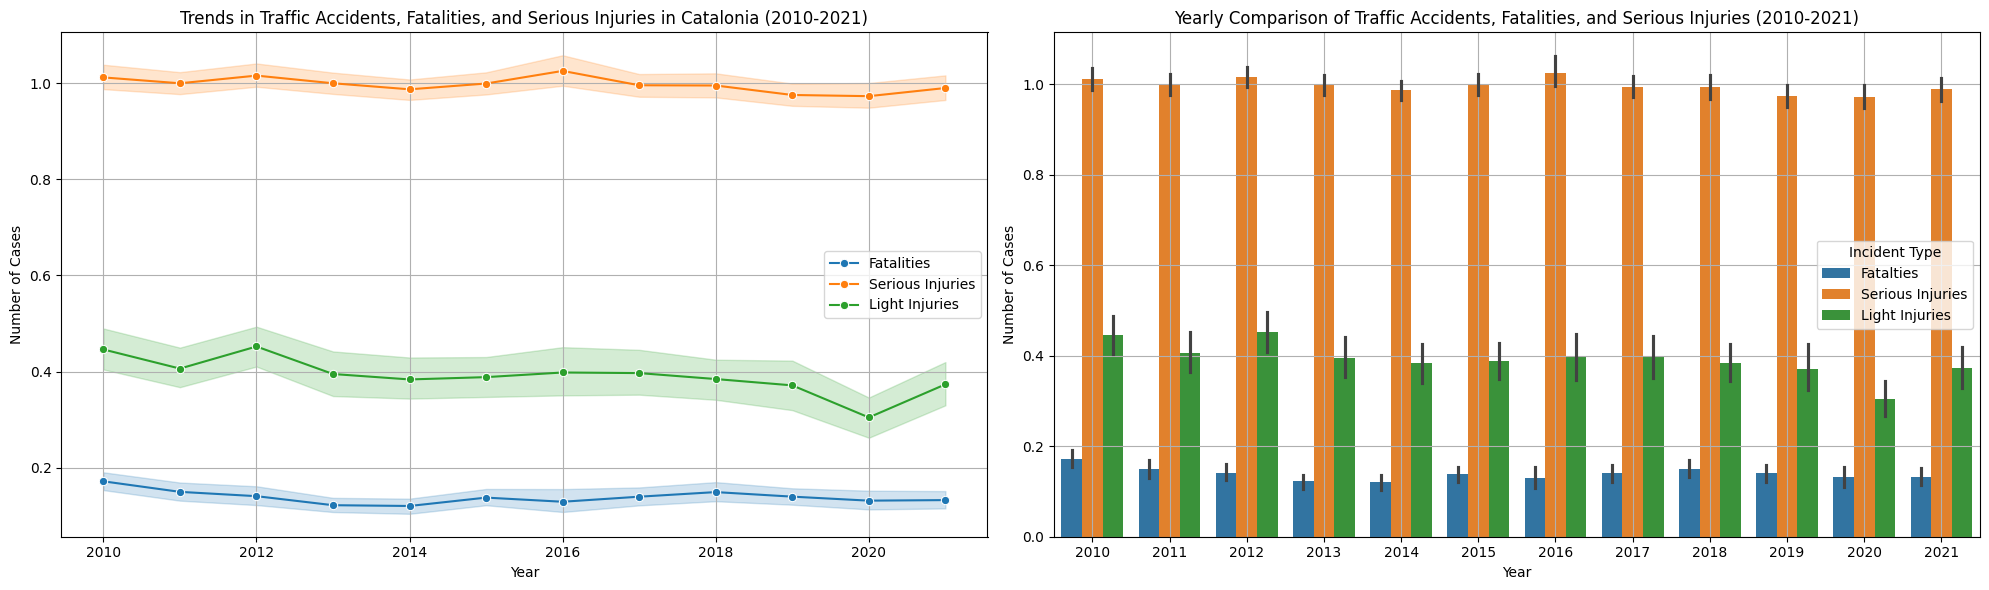

In [6]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Plotting Fatalties
sns.lineplot(x='Year', y='Fatalties', data=df, marker='o', label='Fatalities')
# Plotting Serious Injuries
sns.lineplot(x='Year', y='Serious Injuries', data=df, marker='o', label='Serious Injuries')
# Plotting Light Injuries
sns.lineplot(x='Year', y='Light Injuries', data=df, marker='o', label='Light Injuries')
plt.title('Trends in Traffic Accidents, Fatalities, and Serious Injuries in Catalonia (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
df_melted = df_fatalties.melt(id_vars='Year', var_name='Type', value_name='Cases')
sns.barplot(data=df_melted, x='Year', y='Cases', hue='Type')
plt.title('Yearly Comparison of Traffic Accidents, Fatalities, and Serious Injuries (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Incident Type')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
df["Type of Road"].unique()

array(['Via urbana( inclou carrer i carrer residencial)',
       'Carretera convencional', 'Altres', 'Autopista', 'Autovia',
       'CamÃ\xad rural/pista forestal'], dtype=object)

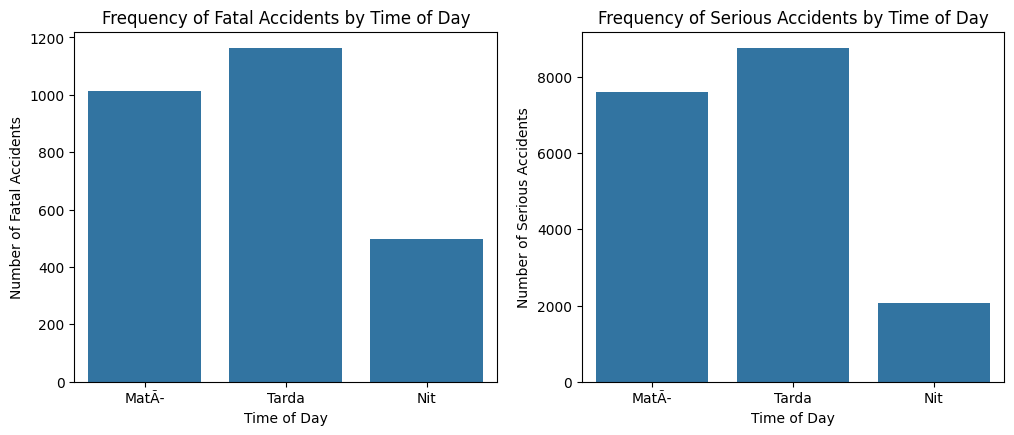

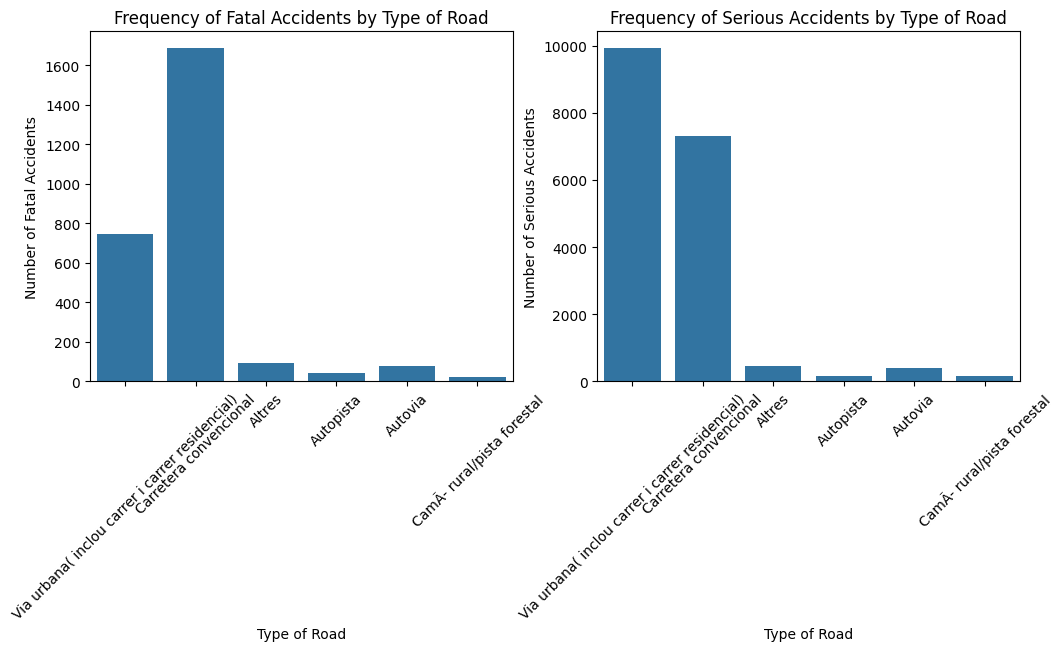

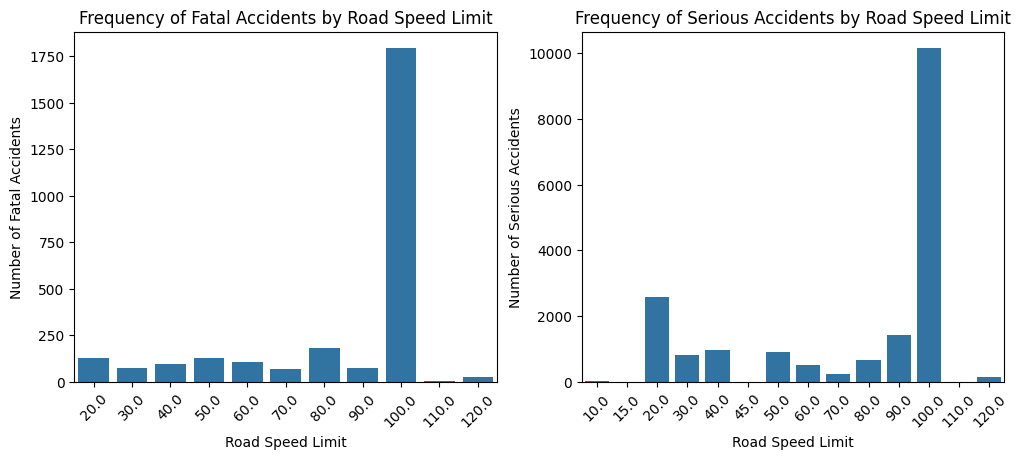

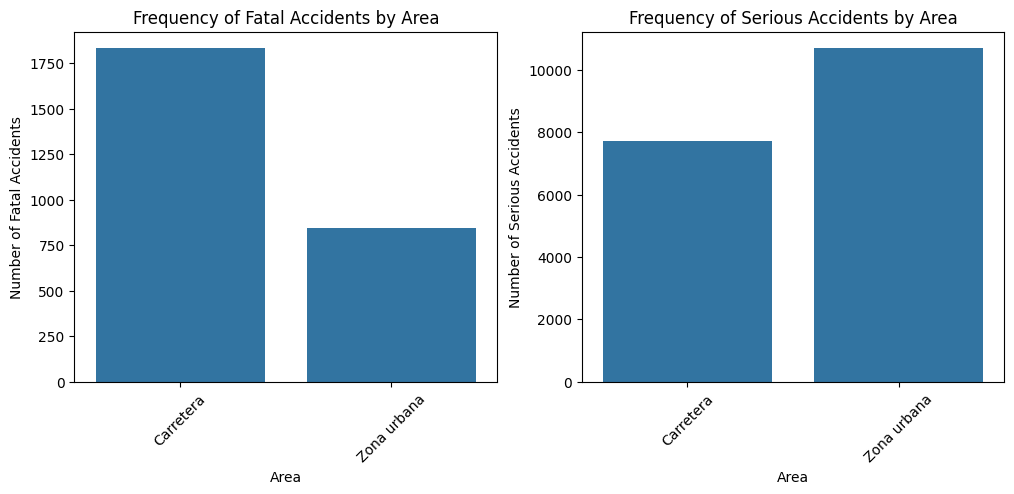

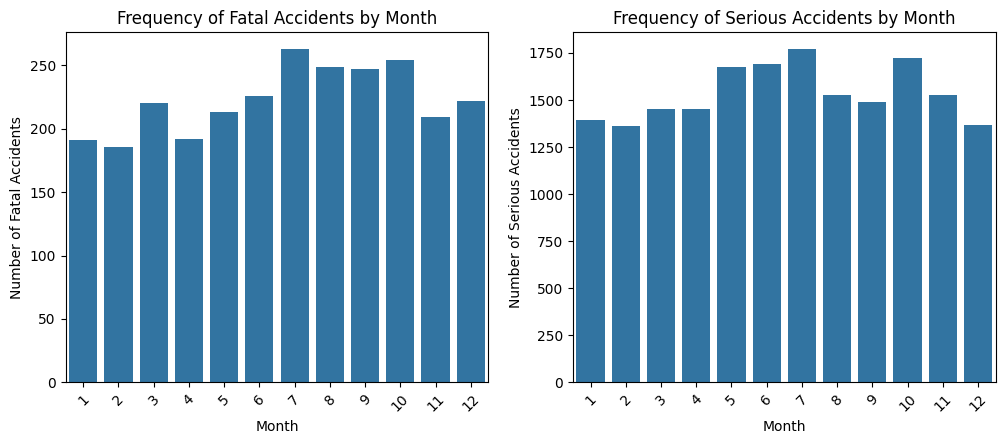

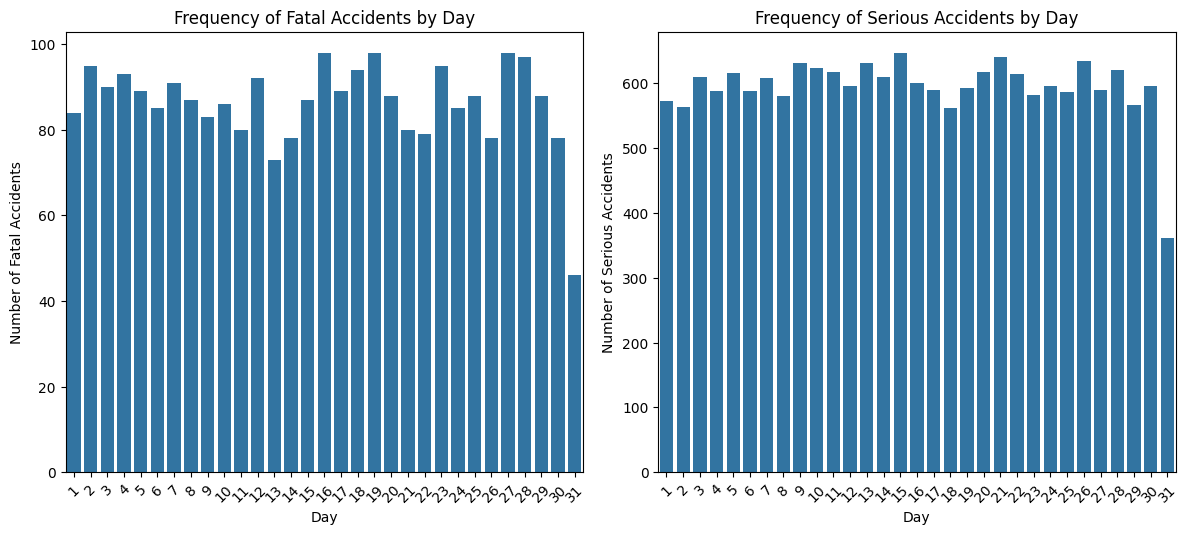

In [8]:
mortal_accident = df[(df["Severity of Accident"] == 'Accident mortal')]
greu_accident = df[(df["Severity of Accident"] == 'Accident greu')]
time_of_day_order = ['MatÃ\xad', 'Tarda', 'Nit']  # Assurez-vous que cela correspond aux valeurs dans votre DataFrame
# Définissez l'ordre que vous souhaitez pour 'Type of Road'
type_of_road_order = ['Via urbana( inclou carrer i carrer residencial)',
       'Carretera convencional', 'Altres', 'Autopista', 'Autovia',
       'CamÃ\xad rural/pista forestal']

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Time of Day Grouping', data=mortal_accident, order=time_of_day_order)
plt.title('Frequency of Fatal Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fatal Accidents')

plt.subplot(2, 2, 2)
sns.countplot(x='Time of Day Grouping', data=greu_accident, order=time_of_day_order)
plt.title('Frequency of Serious Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Serious Accidents')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Type of Road', data=mortal_accident, order=type_of_road_order)
plt.title('Frequency of Fatal Accidents by Type of Road')
plt.xlabel('Type of Road')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Type of Road', data=greu_accident, order=type_of_road_order)
plt.title('Frequency of Serious Accidents by Type of Road')
plt.xlabel('Type of Road')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Road Speed Limit', data=mortal_accident)
plt.title('Frequency of Fatal Accidents by Road Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Road Speed Limit', data=greu_accident)
plt.title('Frequency of Serious Accidents by Road Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))

order_area = ['Carretera', 'Zona urbana']
plt.subplot(2, 2, 3)
sns.countplot(x='Area', data=mortal_accident, order=order_area)
plt.title('Frequency of Fatal Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Area', data=greu_accident, order=order_area)
plt.title('Frequency of Serious Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 3)
sns.countplot(x="Month", data=mortal_accident)
plt.title('Frequency of Fatal Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x="Month", data=greu_accident)
plt.title('Frequency of Serious Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 3)
sns.countplot(x="Day", data=mortal_accident)
plt.title('Frequency of Fatal Accidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x="Day", data=greu_accident)
plt.title('Frequency of Serious Accidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\hugoz\AppData\Local\Temp\ipykernel_21388\1938754983.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accidents', y='Municipality Name', data=top_municipalities, palette='viridis')


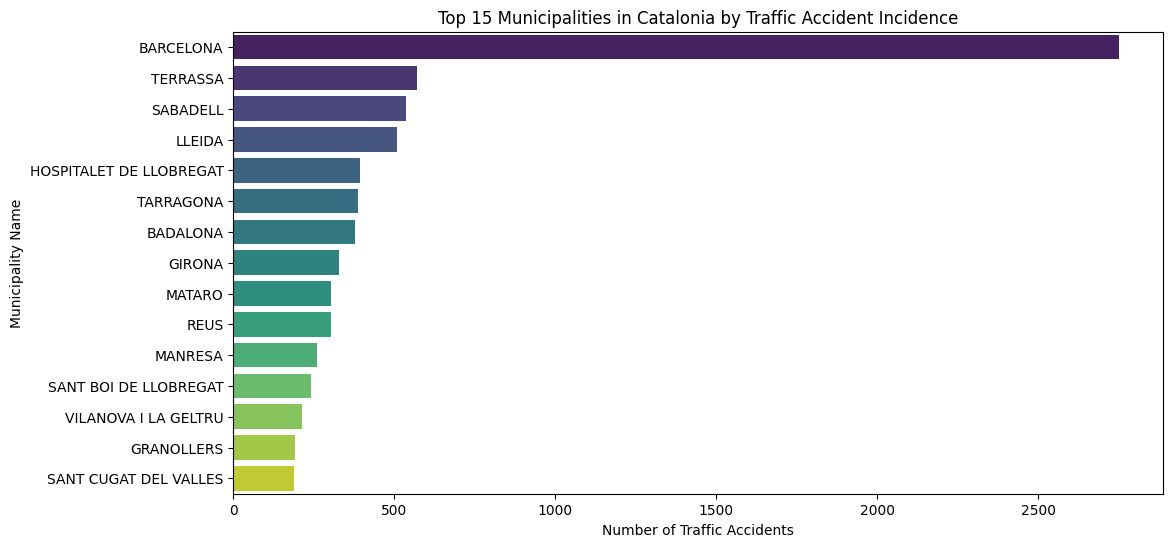

In [9]:
municipality_accidents = df.groupby('Municipality Name').size().reset_index(name='Accidents')

# Now let's sort the data to find the top municipalities with the most accidents
top_municipalities = municipality_accidents.sort_values('Accidents', ascending=False).head(15)

# We can plot this as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Accidents', y='Municipality Name', data=top_municipalities, palette='viridis')
plt.title('Top 15 Municipalities in Catalonia by Traffic Accident Incidence')
plt.xlabel('Number of Traffic Accidents')
plt.ylabel('Municipality Name')
plt.show()

In [22]:
density_data = pd.DataFrame.from_dict({
    'Municipality Name': [
        'BARCELONA',
        'TERRASSA', 
        'SABADELL', 
        'LLEIDA', 
        'HOSPITALET DE LLOBREGAT', 
        'TARRAGONA', 
        'BADALONA', 
        'GIRONA', 
        'MATARO',
        'REUS',
        'MANRESA',
        'SANT BOI DE LLOBREGAT',
        'VILANOVA I LA GELTRU',
        'GRANOLLERS',
        'SANT CUGAT DEL VALLES'
    ],
    'Population Density': [
        16339,
        3210,
        5767,
        673,
        22307,
        2389,
        10590,
        2659,
        5752,
        2054,
        1886,
        1729,
        2023,
        4233,
        2023
    ]
})

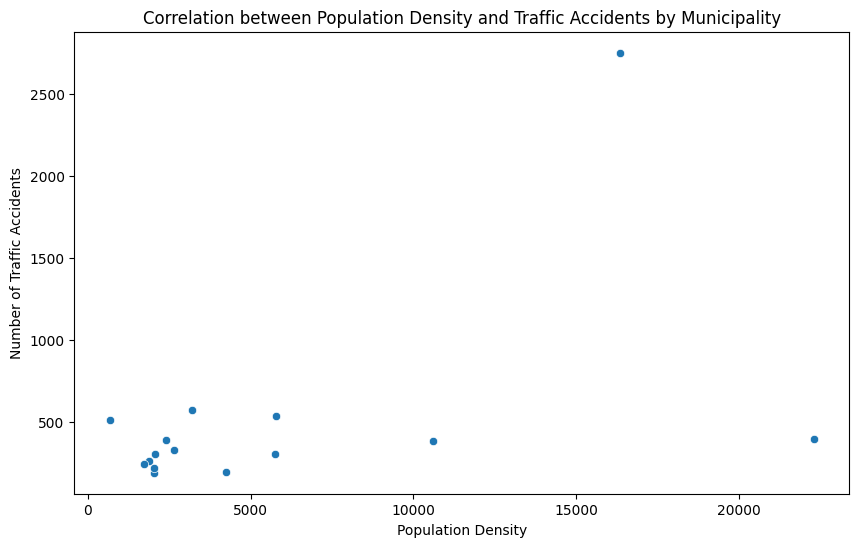

In [24]:
# If you want to correlate this with population density, you would ideally have another DataFrame
# that includes population density data for each municipality. Here's a conceptual example:
# You would merge this data with your accident data
merged_data = pd.merge(municipality_accidents, density_data, on='Municipality Name')

# Then you could create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Density', y='Accidents', data=merged_data)
plt.title('Correlation between Population Density and Traffic Accidents by Municipality')
plt.xlabel('Population Density')
plt.ylabel('Number of Traffic Accidents')
plt.show()

# For road network characteristics, you would follow a similar approach,
# merging your accident data with a dataset that includes information about the road network.

# Note: The above code assumes that you have additional datasets containing the population density
# and road network characteristics. You will need to merge these datasets with your accident data
# based on common columns (like 'Municipality Name') to perform the correlation analysis.

In [15]:
df_density = pd.read_csv('./data/density.csv', sep=',')


In [17]:
df_density['Unnamed: 0'].unique()

array(['Alt Camp', 'Alt Empordà', 'Alt Penedès', 'Alt Urgell',
       'Alta Ribagorça', 'Anoia', 'Aran', 'Bages', 'Baix Camp',
       'Baix Ebre', 'Baix Empordà', 'Baix Llobregat', 'Baix Penedès',
       'Barcelonès', 'Berguedà', 'Cerdanya', 'Conca de Barberà', 'Garraf',
       'Garrigues', 'Garrotxa', 'Gironès', 'Maresme', 'Moianès',
       'Montsià', 'Noguera', 'Osona', 'Pallars Jussà', 'Pallars Sobirà',
       "Pla d'Urgell", "Pla de l'Estany", 'Priorat', "Ribera d'Ebre",
       'Ripollès', 'Segarra', 'Segrià', 'Selva', 'Solsonès', 'Tarragonès',
       'Terra Alta', 'Urgell', 'Vallès Occidental', 'Vallès Oriental',
       'Catalonia', 'Metropolità', 'Comarques Gironines',
       'Camp de Tarragona', "Terres de l'Ebre", 'Ponent',
       'Comarques Centrals', 'Alt Pirineu i Aran', 'Penedès', 'Barcelona',
       'Girona', 'Lleida', 'Tarragona'], dtype=object)